# Density Matrices

## Outline

- [Introduction](#introduction)
- [Pre-course Survey](#pre-course-survey)
- [Basics](#basics)
    - [Definition](#definition)
    - [Random examples](#random-examples)
    - [Connection to quantum state vectors](#connection-to-quantum-state-vectors)
- [Convex combinations of density matrices](#convex-combinations-of-density-matrices)
    - [The completely mixed state](#the-completely-mixed-state)
    - [Probabilistic states](#probabilistic-states)
    - [Density matrices and the spectral theorem](#density-matrices-and-the-spectral-theorem)
- [Bloch sphere](#bloch-sphere)
    - [Six important states](#six-important-states)
    - [Convex combinations of points](#convex-combinations-of-points)
    - [Plotting Bloch sphere points in Qiskit](#plotting-bloch-sphere-points-in-qiskit)
- [Multiple systems and reduced states](#multiple-systems-and-reduced-states)
    - [Multiple systems](#multiple-systems)
    - [Reduced states and the partial trace](#reduced-states-and-the-partial-trace)


## [Introduction](#introduction)

In the general formulation of quantum information, quantum states are not represented by vectors like we have in the simplified formulation, but instead are represented by a special class of matrices called density matrices.

At first glance it may seem peculiar that quantum states are represented by matrices, which more typically represent actions or operations as opposed to states. For example, unitary matrices describe quantum operations in the simplified formulation of quantum information and stochastic matrices describe probabilistic operations in the context of classical information. In contrast, although density matrices are indeed matrices, they represent states — not actions or operations to which we typically associate an intuitive meaning.

Nevertheless, the fact that density matrices can (like all matrices) be associated with linear mappings is a critically important aspect of them. For example, the eigenvalues of density matrices describe the randomness or uncertainty inherent to the states they represent.

Before we proceed to the definition of density matrices, here are a few key points that motivate their use.

- Density matrices can represent a broader class of quantum states than quantum state vectors. This includes states that arise in practical settings, such as states of quantum systems that have been subjected to noise, as well as random choices of quantum states.

- Density matrices allow us to describe states of isolated parts of systems, such as the state of one system that happens to be entangled with another system that we wish to ignore. This isn't easily done in the simplified formulation of quantum information.

- Classical (probabilistic) states can also be represented by density matrices, specifically ones that are diagonal. This is important because it allows quantum and classical information to be described together within a single mathematical framework, with classical information essentially being a special case of quantum information.

## [Basics](#basics)

We'll begin by describing what density matrices are in mathematical terms, and then we'll take a look at some examples. After that, we'll discuss a few basic aspects of how density matrices work and how they relate to quantum state vectors in the simplified formulation of quantum information.

### [Definition](#definition)
Suppose that we have a quantum system named $X$, and let $\Sigma$ be the (finite and nonempty) classical state set of this system. Here we're mirroring the naming conventions used in the *Basics of quantum information* course, which we'll continue to do when the opportunity arises.

In the general formulation of quantum information, a quantum state of the system $X$ is described by a *density matrix* $\rho$ whose entries are complex numbers and whose indices (for both its rows and columns) have been placed in correspondence with the classical state set $\Sigma$. The lowercase Greek letter $\rho$ is a conventional first choice for the name of a density matrix and $\sigma$ and $\xi$ are also common choices.

Here are a few examples of density matrices that describe states of qubits:

$$
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix},
\quad
\begin{pmatrix}
\frac{1}{2} & \frac{1}{2} \\
\frac{1}{2} & \frac{1}{2}
\end{pmatrix},
\quad
\begin{pmatrix}
\frac{3}{4} & -\frac{i}{8} \\
\frac{i}{8} & \frac{1}{4}
\end{pmatrix},
\quad \text{and} \quad
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}.
$$

To say that $\rho$ is a density matrix means that these two conditions, which will be explained momentarily, are both satisfied:

1. **Unit trace**: $\text{Tr}(\rho) = 1$
2. **Positive semidefiniteness**: $\rho \geq 0$

---

The first condition refers to the **trace** of a matrix. This is a function that is defined for all square matrices as the sum of the diagonal entries:

$$
\text{Tr}
\begin{pmatrix}
\alpha_{0,0} & \alpha_{0,1} & \cdots & \alpha_{0,n-1} \\
\alpha_{1,0} & \alpha_{1,1} & \cdots & \alpha_{1,n-1} \\
\vdots & \vdots & \ddots & \vdots \\
\alpha_{n-1,0} & \alpha_{n-1,1} & \cdots & \alpha_{n-1,n-1}
\end{pmatrix}
= \alpha_{0,0} + \alpha_{1,1} + \cdots + \alpha_{n-1,n-1}
$$

The trace is a **linear** function: for any two square matrices $A$ and $B$ of the same size and any two complex numbers $\alpha$ and $\beta$, the following equation is always true:

$$
\text{Tr}(\alpha A + \beta B) = \alpha \, \text{Tr}(A) + \beta \, \text{Tr}(B)
$$

The trace is an extremely important function and there's a lot more that can be said about it, but we'll wait until the need arises to say more.

---

The second condition refers to the property of a matrix being **positive semidefinite**, which is a truly fundamental concept in quantum information theory (and in many other subjects). A matrix $P$ is *positive semidefinite* if there exists a matrix $M$ such that

$$
P = M^\dagger M.
$$

Here we can either demand that $M$ is a square matrix of the same size as $P$ or allow it to be non-square — we obtain the same class of matrices either way.

There are several alternative (but equivalent) ways to define this condition, including these:

- A matrix $P$ is positive semidefinite if and only if $P$ is Hermitian (i.e., equal to its own conjugate transpose) and all of its eigenvalues are nonnegative real numbers. Checking that a matrix is Hermitian and all of its eigenvalues are nonnegative is a simple computational way to verify that it's positive semidefinite.

- A matrix $P$ is positive semidefinite if and only if $\langle \psi | P | \psi \rangle \geq 0$ for every complex vector $|\psi\rangle$ having the same indices as $P$.

An intuitive way to think about positive semidefinite matrices is that they're like matrix analogues of nonnegative real numbers. That is, positive semidefinite matrices are to complex square matrices as nonnegative real numbers are to complex numbers. For example, a complex number $\alpha$ is a nonnegative real number if and only if

$$
\alpha = \overline{\beta} \beta
$$

for some complex number $\beta$, which matches the definition of positive semidefiniteness when we replace matrices with scalars.

While matrices are more complicated objects than scalars in general, this is nevertheless a helpful way to think about positive semidefinite matrices. This also explains why the notation $P \geq 0$ is used to mean that $P$ is positive semidefinite. (Notice in particular that the notation $P \geq 0$ does *not* mean that each entry of $P$ is nonnegative in this context. There are positive semidefinite matrices having negative entries as well as matrices whose entries are all positive that are not positive semidefinite.)

---

At this point the definition of density matrices may seem rather arbitrary and abstract, as we have not yet associated any meaning with these matrices or their entries. The way density matrices work and can be interpreted will be clarified as the lesson continues, but for now it may be helpful to think about the entries of density matrices in the following (rather informal) way:

- The *diagonal* entries of a density matrix give us the probabilities for each classical state to appear if we perform a standard basis measurement — so we can think about these entries as describing the "weight" associated with each classical state.

- The *off-diagonal* entries of a density matrix describe the degree to which the two classical states corresponding to that entry (meaning the one corresponding to the row and the one corresponding to the column) are in *quantum superposition*, as well as the relative phase between them.

---

It is certainly not obvious *a priori* that quantum states should be represented by density matrices. Indeed, there is a sense in which the choice to represent quantum states by density matrices leads naturally to the entire mathematical description of quantum information. Everything else about quantum information actually follows pretty logically from this one choice!

### [Random examples](#random-examples)
We'll see several examples of density matrices throughout the lesson, including ones that represent states encountered earlier in the series. To begin, let's take a look as some randomly generated examples. We'll begin with some random examples of positive semidefinite matrices, and from these examples we can obtain examples of density matrices by simply normalizing — which in this context means dividing by the trace.

In [1]:
# Required imports for code cells

from qiskit.quantum_info import Statevector, Operator, DensityMatrix
from qiskit.visualization import array_to_latex
import numpy as np
from numpy import linalg

print('Imports loaded.')

Imports loaded.


The code cell that follows randomly generates a positive semidefinite matrix by first generating an $n \times n$ matrix $M$ whose entries have real and imaginary parts chosen independently and uniformly from the set $\{-9, \dots, 9\}$ and then outputting the positive semidefinite matrix $P = M^\dagger M$. Through this method we'll only obtain matrices whose entries have integer real and imaginary parts that aren't too large, which will make the examples more readable — but be aware that not every positive semidefinite matrix has this property. Changing the dimension $n$ and running the cells multiple times may help to develop a sense for what positive semidefinite matrices look like.


In [2]:
# Randomly generate a positive semidefinite matrix

n = 3
M = np.random.randint(-9, 10, size=(n, n)) + 1j * np.random.randint(-9, 10, size=(n, n))
P = M.conj().T @ M

display(array_to_latex(P))

<IPython.core.display.Latex object>

(Here we're using Qiskit's `array_to_latex` function to obtain a more human-readable output format for the matrix. Substituting `display(P)` for `display(array_to_latex(P))` shows the result using the standard matrix representation in Python.)

The fact that each randomly generated positive semidefinite matrix is Hermitian can be checked by inspection. We can also compute the eigenvalues to see that they're always nonnegative real numbers.

In [3]:
# Compute the eigenvalues (in decreasing order)

display(array_to_latex(np.sort(linalg.eigvals(P))[::-1]))

<IPython.core.display.Latex object>

Random examples generated in this way are naturally limited in what they can tell us, but we can observe some features that are true in general for positive semidefinite matrices. In particular, the diagonal entries are always nonnegative real numbers, and the off-diagonal entries are never "too large" in comparison to the two corresponding diagonal entries (meaning the diagonal entries in the same row and the same column as the chosen off-diagonal entry).

As was already suggested, to generate a random density matrix we can use the same procedure to generate a random positive semidefinite matrix and then divide this matrix by its trace. The following code cell does this. (Note that the cell will throw a warning if by chance $P$ is the all-zero matrix, which is possible but unlikely — this can only happen when $M$ is the all-zero matrix.)

In [4]:
# Randomly generate a density matrix

n = 3
M = np.random.randint(-9, 10, size=(n, n)) + 1j * np.random.randint(-9, 10, size=(n, n))
P = M.conj().T @ M
rho = P/np.trace(P)

display(array_to_latex(rho))

<IPython.core.display.Latex object>

(The array_to_latex function does its best to provide a symbolic representation of the matrix, but it's not exact and will occasionally produce unusual expressions that happen to closely approximate the actual results.)

Notice that the diagonal entries are always nonnegative and sum to 1 so they form a probability vector. This probability vector specifies the probabilities for obtaining each possible classical state from a standard basis measurement, as was already suggested.

We can also compute the eigenvalues of these randomly generated density matrices. Although the eigenvalues are usually different from the diagonal entries, they also form a probability vector. This is a consequence of the following basic fact from matrix theory.

> *Theorem:* The trace of a square matrix is equal to the sum of its eigenvalues, with each eigenvalue being included in the sum a number of times equal to its multiplicity.

In [5]:
# Compute the eigenvalues (in decreasing order)

display(array_to_latex(np.sort(linalg.eigvals(rho))[::-1]))

<IPython.core.display.Latex object>

In [6]:
# Initialize and display a density matrix
# using the DensityMatrix package

rho = DensityMatrix([[3/4, 1j/8],[-1j/8,1/4]])
display(rho.draw('latex'))

<IPython.core.display.Latex object>

### [Connection to quantum state vectors](#connection-to-quantum-state-vectors)

Recall that a quantum state vector $|\psi\rangle$ describing a quantum state of $X$ is a column vector having Euclidean norm equal to 1 whose entries have been placed in correspondence with the classical state set $\Sigma$. The density matrix representation $\rho$ of the same state is defined as follows:

$$
\rho = |\psi\rangle \langle \psi|
$$

To be clear, we're multiplying a column vector to a row vector, so the result is a square matrix whose rows and columns correspond to $\Sigma$. Matrices of this form, in addition to being density matrices, are always projections and have rank equal to 1.

---

For example, let us define two qubit state vectors as follows.

$$
|+i\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}} |1\rangle = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
\frac{i}{\sqrt{2}}
\end{pmatrix}
$$

$$
|-i\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{i}{\sqrt{2}} |1\rangle = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}}
\end{pmatrix}
$$

---

The density matrices corresponding to these two vectors are as follows.

$$
|+i\rangle \langle +i| = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
\frac{i}{\sqrt{2}}
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{-i}{\sqrt{2}}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2} & \frac{-i}{2} \\
\frac{i}{2} & \frac{1}{2}
\end{pmatrix}
$$

$$
|-i\rangle \langle -i| = 
\begin{pmatrix}
\frac{1}{\sqrt{2}} \\
\frac{-i}{\sqrt{2}}
\end{pmatrix}
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{i}{\sqrt{2}}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2} & \frac{i}{2} \\
\frac{-i}{2} & \frac{1}{2}
\end{pmatrix}
$$

---

Here these examples are included with a few other basic examples: $|0\rangle$, $|1\rangle$, $|+\rangle$, and $|-\rangle$. We'll see these six states again later in the lesson.

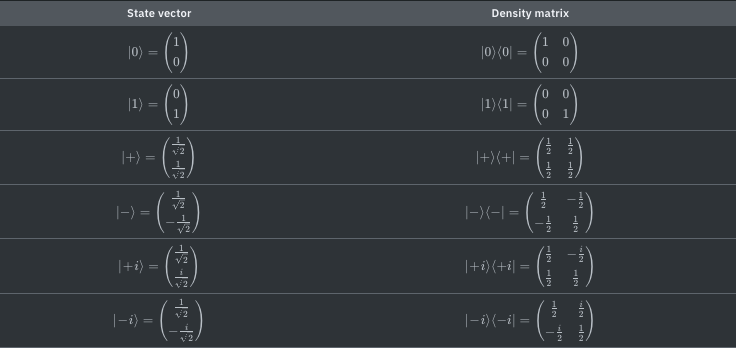

For one more example, here's a state from the *Single systems* lesson, including both its state vector and density matrix representations.

$$
|v\rangle = \frac{1 + 2i}{3} |0\rangle - \frac{2}{3} |1\rangle
\quad\quad
|v\rangle \langle v| =
\begin{pmatrix}
\frac{5}{9} & \frac{-2 - 4i}{9} \\
\frac{-2 + 4i}{9} & \frac{4}{9}
\end{pmatrix}
$$

To check these density matrix representations, we can compute by hand or ask Qiskit to perform the conversion using the `.to_operator` method from the `Statevector` class. Here we also use the `.from_label` method to define the first six state vectors for convenience.



In [7]:
# Define and display examples of density matrices
# using the Statevector package

ket_0 = Statevector.from_label('0')
ket_1 = Statevector.from_label('1')
ket_plus = Statevector.from_label('+')
ket_minus = Statevector.from_label('-')
ket_iplus = Statevector.from_label('r')
ket_iminus = Statevector.from_label('l')
v = Statevector([(1 + 2j) / 3, -2 / 3])

display(array_to_latex(ket_0.to_operator()))
display(array_to_latex(ket_1.to_operator()))
display(array_to_latex(ket_plus.to_operator()))
display(array_to_latex(ket_minus.to_operator()))
display(array_to_latex(ket_iplus.to_operator()))
display(array_to_latex(ket_iminus.to_operator()))
display(array_to_latex(v.to_operator()))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
# Define and display examples of density matrices
# using the DensityMatrix package

rho_0 = DensityMatrix.from_label('0')
rho_1 = DensityMatrix.from_label('1')
rho_plus = DensityMatrix.from_label('+')
rho_minus = DensityMatrix.from_label('-')
rho_iplus = DensityMatrix.from_label('r')
rho_iminus = DensityMatrix.from_label('l')

display(rho_0.draw('latex'))
display(rho_1.draw('latex'))
display(rho_plus.draw('latex'))
display(rho_minus.draw('latex'))
display(rho_iplus.draw('latex'))
display(rho_iminus.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Density matrices that take the form $\rho = |\psi\rangle \langle \psi|$ for some quantum state vector $|\psi\rangle$ are known as *pure states*. Not every density matrix can be written in this form; some states are not pure.

As density matrices, pure states always have one eigenvalue equal to 1 and all other eigenvalues equal to 0. This is consistent with the interpretation that the eigenvalues of a density matrix describe the randomness or uncertainty inherent to that state. A way to think about this is that there's no uncertainty for a pure state $\rho = |\psi\rangle \langle \psi|$ — the state is definitely $|\psi\rangle$.

---

In general, for a quantum state vector

$$
|\psi\rangle =
\begin{pmatrix}
\alpha_0 \\
\alpha_1 \\
\vdots \\
\alpha_{n-1}
\end{pmatrix}
$$

for a system with $n$ classical states, the density matrix representation of the same state is as follows.

$$
|\psi\rangle \langle \psi| =
\begin{pmatrix}
\alpha_0 \overline{\alpha_0} & \alpha_0 \overline{\alpha_1} & \cdots & \alpha_0 \overline{\alpha_{n-1}} \\
\alpha_1 \overline{\alpha_0} & \alpha_1 \overline{\alpha_1} & \cdots & \alpha_1 \overline{\alpha_{n-1}} \\
\vdots & \vdots & \ddots & \vdots \\
\alpha_{n-1} \overline{\alpha_0} & \alpha_{n-1} \overline{\alpha_1} & \cdots & \alpha_{n-1} \overline{\alpha_{n-1}}
\end{pmatrix}
=
\begin{pmatrix}
|\alpha_0|^2 & \alpha_0 \overline{\alpha_1} & \cdots & \alpha_0 \overline{\alpha_{n-1}} \\
\alpha_1 \overline{\alpha_0} & |\alpha_1|^2 & \cdots & \alpha_1 \overline{\alpha_{n-1}} \\
\vdots & \vdots & \ddots & \vdots \\
\alpha_{n-1} \overline{\alpha_0} & \alpha_{n-1} \overline{\alpha_1} & \cdots & |\alpha_{n-1}|^2
\end{pmatrix}
$$

Thus, for the special case of pure states, we can verify that the diagonal entries of a density matrix describe the probabilities that a standard basis measurement would output each possible classical state.

---

A final remark about pure states is that density matrices eliminate the degeneracy concerning *global phases* found for quantum state vectors. Suppose we have two quantum state vectors that differ by a global phase: $|\psi\rangle$ and $|\phi\rangle = e^{i\theta}|\psi\rangle$, for some real number $\theta$. Because they differ by a global phase, these vectors represent exactly the same quantum state, despite the fact that the vectors may be different. The density matrices that we obtain from these two state vectors, on the other hand, are identical.

$$
|\phi\rangle \langle \phi| = (e^{i\theta}|\psi\rangle)(e^{i\theta}|\psi\rangle)^\dagger = e^{i\theta} e^{-i\theta} |\psi\rangle \langle \psi| = |\psi\rangle \langle \psi|
$$

In general, density matrices provide a unique representation of quantum states: two quantum states are identical, generating exactly the same outcome statistics for every possible measurement that can be performed on them, if and only if their density matrix representations are equal. Using mathematical parlance, we can express this by saying that density matrices offer a *faithful* representation of quantum states.


## [Convex combinations of density matrices](#convex-combinations-of-density-matrices)

A key aspect of density matrices is that *probabilistic selections* of quantum states are represented by *convex combinations* of their associated density matrices.

For example, if we have two density matrices, $\rho$ and $\sigma$, representing quantum states of a system $X$, and we prepare the system in the state $\rho$ with probability $p \in [0, 1]$ and $\sigma$ with probability $1 - p$, then the resulting quantum state is represented by the density matrix

$$
p \rho + (1 - p) \sigma.
$$

More generally, if we have $m$ quantum states represented by density matrices $\rho_0, \dots, \rho_{m-1}$, and a system is prepared in the state $\rho_k$ with probability $p_k$ for some probability vector $(p_0, \dots, p_{m-1})$, the resulting state is represented by the density matrix

$$
\sum_{k=0}^{m-1} p_k \rho_k.
$$

This is a *convex combination* of the density matrices $\rho_0, \dots, \rho_{m-1}$.

---

If we suppose that we have $m$ quantum state vectors $|\psi_0\rangle, \dots, |\psi_{m-1}\rangle$, and we prepare a system in the state $|\psi_k\rangle$ with probability $p_k$ for each $k \in \{0, \dots, m - 1\}$, the state we obtain is represented by the density matrix

$$
\sum_{k=0}^{m-1} p_k |\psi_k\rangle \langle \psi_k|.
$$

---

For example, if a qubit is prepared in the state $|0\rangle$ with probability $1/2$ and in the state $|+\rangle$ with probability $1/2$, the density matrix representation of the state we obtain is given by

$$
\frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |+\rangle \langle +| =
\frac{1}{2} \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
+ \frac{1}{2} \begin{pmatrix} \tfrac{1}{2} & \tfrac{1}{2} \\ \tfrac{1}{2} & \tfrac{1}{2} \end{pmatrix}
=
\begin{pmatrix}
\tfrac{3}{4} & \tfrac{1}{4} \\
\tfrac{1}{4} & \tfrac{1}{4}
\end{pmatrix}
$$

In the simplified formulation of quantum information, averaging quantum state vectors like this doesn’t work. For instance, the vector

$$
\frac{1}{2} |0\rangle + \frac{1}{2} |+\rangle = \frac{1}{2}
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
+ \frac{1}{2}
\begin{pmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{1}{\sqrt{2}} \end{pmatrix}
=
\begin{pmatrix}
\frac{2 + \sqrt{2}}{4} \\
\frac{\sqrt{2}}{4}
\end{pmatrix}
$$

is not a valid quantum state vector because its Euclidean norm is not equal to 1.

---

A more extreme example that shows that this doesn’t work for quantum state vectors is that we fix any quantum state vector $|\psi\rangle$ that we wish, and then we take our state to be $|\psi\rangle$ with probability $1/2$ and $-|\psi\rangle$ with probability $1/2$. These states differ by a global phase, so they're actually the same state — but averaging gives us the zero vector, which is not a valid quantum state vector.

---

### The completely mixed state

Suppose we set the state of a qubit to be $|0\rangle$ or $|1\rangle$ randomly, each with probability $1/2$. The density matrix representing the resulting state is as follows. (In this context the symbol $\mathbb{I}$ denotes the $2 \times 2$ identity matrix.)

$$
\frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1|
=
\frac{1}{2}
\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix} 0 & 0 \\ 0 & 1 \end{pmatrix}
=
\begin{pmatrix} \tfrac{1}{2} & 0 \\ 0 & \tfrac{1}{2} \end{pmatrix}
=
\frac{1}{2} \mathbb{I}
$$

This is a special state known as the *completely mixed state*. It represents complete uncertainty about the state of a qubit, similar to a uniform random bit in the probabilistic setting.

---

Now suppose that we change the procedure: in place of the states $|0\rangle$ and $|1\rangle$ we’ll use the states $|+\rangle$ and $|-\rangle$. We can compute the density matrix that describes the resulting state in a similar way:

$$
\frac{1}{2} |+\rangle \langle +| + \frac{1}{2} |-\rangle \langle -|
=
\frac{1}{2}
\begin{pmatrix} \tfrac{1}{2} & \tfrac{1}{2} \\ \tfrac{1}{2} & \tfrac{1}{2} \end{pmatrix}
+
\frac{1}{2}
\begin{pmatrix} \tfrac{1}{2} & -\tfrac{1}{2} \\ -\tfrac{1}{2} & \tfrac{1}{2} \end{pmatrix}
=
\begin{pmatrix} \tfrac{1}{2} & 0 \\ 0 & \tfrac{1}{2} \end{pmatrix}
=
\frac{1}{2} \mathbb{I}
$$

It's the same density matrix as before, even though we changed the states. We would again obtain the same result — the *completely mixed state* — by substituting any two orthogonal qubit state vectors for $|0\rangle$ and $|1\rangle$.

This is a feature not a bug! We do in fact obtain exactly the same state either way. That is, there's no way to distinguish the two procedures by measuring the qubit they produce, even in a statistical sense — so we’ve simply described the same state in two different ways.

---

We can verify that this makes sense by thinking about what we could hope to learn given a random selection of a state from one of the two possible state sets $\{|0\rangle, |1\rangle\}$ and $\{|+\rangle, |-\rangle\}$. To keep things simple, let's suppose that we perform a unitary operation $U$ on our qubit and then measure in the standard basis.

In the first scenario, the state of the qubit is chosen uniformly from the set $\{|0\rangle, |1\rangle\}$. If the state is $|0\rangle$, we obtain the outcomes 0 and 1 with probabilities

$$
|\langle 0 | U | 0 \rangle|^2 \quad \text{and} \quad |\langle 1 | U | 0 \rangle|^2
$$

respectively. If the state is $|1\rangle$, we obtain the outcomes 0 and 1 with probabilities

$$
|\langle 0 | U | 1 \rangle|^2 \quad \text{and} \quad |\langle 1 | U | 1 \rangle|^2.
$$

Because the two possibilities each happen with probability $1/2$, we obtain the outcome 0 with probability

$$
\frac{1}{2} |\langle 0 | U | 0 \rangle|^2 + \frac{1}{2} |\langle 0 | U | 1 \rangle|^2
$$

and the outcome 1 with probability

$$
\frac{1}{2} |\langle 1 | U | 0 \rangle|^2 + \frac{1}{2} |\langle 1 | U | 1 \rangle|^2.
$$

Both of these expressions are equal to $1/2$. One way to argue this is to use a fact from linear algebra that can be seen as a generalization of the Pythagorean theorem.

> **Theorem.** Suppose $\{|\psi_1\rangle, \dots, |\psi_n\rangle\}$ is an orthonormal basis of a (real or complex) vector space $\mathcal{V}$. For every vector $|\phi\rangle \in \mathcal{V}$ we have
> $$
> |\langle \psi_1 | \phi \rangle|^2 + \dots + |\langle \psi_n | \phi \rangle|^2 = \| |\phi\rangle \|^2.
> $$

---

We can apply this theorem to determine the probabilities as follows. The probability to get 0 is

$$
\frac{1}{2} |\langle 0 | U | 0 \rangle|^2 + \frac{1}{2} |\langle 0 | U | 1 \rangle|^2
= \frac{1}{2} \left( |\langle 0 | U | 0 \rangle|^2 + |\langle 0 | U | 1 \rangle|^2 \right)
= \frac{1}{2} \left( |\langle 0 | U | 0 \rangle|^2 + |\langle 0 | U | 1 \rangle|^2 \right)
= \frac{1}{2} \| U^\dagger |0\rangle \|^2
= \frac{1}{2}.
$$

And the probability to get 1 is

$$
\frac{1}{2} |\langle 1 | U | 0 \rangle|^2 + \frac{1}{2} |\langle 1 | U | 1 \rangle|^2
= \frac{1}{2} \left( |\langle 1 | U | 0 \rangle|^2 + |\langle 1 | U | 1 \rangle|^2 \right)
= \frac{1}{2} \| U^\dagger |1\rangle \|^2
= \frac{1}{2}.
$$

Because $U$ is unitary we know that $U^\dagger$ is unitary as well, implying that both $U^\dagger |0\rangle$ and $U^\dagger |1\rangle$ are unit vectors. Both probabilities are therefore equal to $1/2$. This means that no matter how we choose $U$, we're just going to get a uniform random bit from the measurement.

---

We can perform a similar verification for any other pair of orthonormal states in place of $|0\rangle$ and $|1\rangle$. For example, because $\{|+\rangle, |-\rangle\}$ is an orthonormal basis, the probability to obtain the measurement outcome 0 is in the second procedure is

$$
\frac{1}{2} |\langle 0 | U | + \rangle|^2 + \frac{1}{2} |\langle 0 | U | - \rangle|^2
= \frac{1}{2} \| U^\dagger |0\rangle \|^2 = \frac{1}{2}
$$

and the probability to get 1 is the same.

In particular, we obtain exactly the same output statistics as we did for the states $|0\rangle$ and $|1\rangle$.

---

## Probabilistic states

Classical states can be represented by density matrices. In particular, for each classical state $a$ of a system $X$, the density matrix

$$
\rho = |a\rangle \langle a|
$$

represents $X$ being definitively in the classical state $a$. For qubits we have

$$
|0\rangle \langle 0| = \begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}
\quad \text{and} \quad
|1\rangle \langle 1| = \begin{pmatrix} 0 & 0 \\ 0 & 1 \end{pmatrix},
$$

and in general we have a single 1 on the diagonal in the position corresponding to the classical state we have in mind, with all other entries zero.

---

We can then take convex combinations of these density matrices to represent probabilistic states. Supposing for simplicity that our classical state set is $\{0, \dots, n - 1\}$, if we have that $X$ is in the state $a$ with probability $p_a$, for each $a \in \{0, \dots, n - 1\}$, then the density matrix we obtain is

$$
\rho = \sum_{a=0}^{n-1} p_a |a\rangle \langle a| =
\begin{pmatrix}
p_0 & 0 & \cdots & 0 \\
0 & p_1 & \cdots & \vdots \\
\vdots & \vdots & \ddots & 0 \\
0 & \cdots & 0 & p_{n-1}
\end{pmatrix}.
$$

---

Going in the other direction, any diagonal density matrix can naturally be identified with the probabilistic state we obtain by simply reading the probability vector off from the diagonal. To be clear, when a density matrix is diagonal, it's not necessarily the case that we're talking about a classical system, or that the system must have been prepared through the random selection of a classical state, but rather that the state could have been obtained through the random selection of a classical state.

The fact that probabilistic states are represented by diagonal density matrices is consistent with the intuition suggested at the start of the lesson that off-diagonal entries describe the degree to which the two classical states corresponding to the row and column of that entry are in quantum superposition. Here all of the off-diagonal entries are zero, so we just have classical randomness and nothing is in quantum superposition.

---

## Density matrices and the spectral theorem

We've seen that if we take a convex combination of pure states,

$$
\rho = \sum_{k=0}^{m-1} p_k |\psi_k\rangle \langle \psi_k|,
$$

we obtain a density matrix. Every density matrix $\rho$, in fact, can be expressed as a convex combination of pure states like this. That is, there will always exist a collection of unit vectors $\{|\psi_0\rangle, \dots, |\psi_{m-1}\rangle\}$ and a probability vector $(p_0, \dots, p_{m-1})$ for which the equation above is true.

We can, moreover, always choose the number $m$ so that it agrees with the number of classical states of the system being considered, and we can select the quantum state vectors to be orthogonal. The spectral theorem allows us to conclude this. (The statement of this theorem that follows refers to a *normal* matrix $M$. This is a matrix that satisfies $M^\dagger M = M M^\dagger$, or in words, commutes with its own conjugate transpose.)

> **Theorem (spectral theorem).** Let $M$ be a *normal* $n \times n$ complex matrix. There exists an orthonormal basis of $n$ dimensional complex vectors $\{|\psi_0\rangle, \dots, |\psi_{n-1}\rangle\}$ along with complex numbers $\lambda_0, \dots, \lambda_{n-1}$ such that
> $$
> M = \lambda_0 |\psi_0\rangle \langle \psi_0| + \dots + \lambda_{n-1} |\psi_{n-1}\rangle \langle \psi_{n-1}|.
> $$


We can apply this theorem to a given density matrix $\rho$ because density matrices are Hermitian and therefore normal, which allows us to write

$$
\rho = \lambda_0 |\psi_0\rangle \langle \psi_0| + \cdots + \lambda_{n-1} |\psi_{n-1}\rangle \langle \psi_{n-1}|
$$

for some orthonormal basis $\{|\psi_0\rangle, \dots, |\psi_{n-1}\rangle\}$. It remains to verify that $(\lambda_0, \dots, \lambda_{n-1})$ is a probability vector, which we can then rename to $(p_0, \dots, p_{n-1})$ if we wish.

---

The numbers $\lambda_0, \dots, \lambda_{n-1}$ are the eigenvalues of $\rho$, and because $\rho$ is positive semidefinite these numbers must therefore be nonnegative real numbers. We can conclude that $\lambda_0 + \cdots + \lambda_{n-1} = 1$ from the fact that $\rho$ has trace equal to 1. Going through the details will give us an opportunity to point out an important and useful property of the trace.

> **Theorem (cyclic property of the trace).** For any two matrices $A$ and $B$ that give us a square matrix $AB$ by multiplying, the equality $\text{Tr}(AB) = \text{Tr}(BA)$ is true.

---

Note that this theorem works even if $A$ and $B$ are not themselves square matrices — we may have that $A$ is $n \times m$ and $B$ is $m \times n$, for some choice of positive integers $n$ and $m$, so that $AB$ is an $n \times n$ square matrix and $BA$ is an $m \times m$. So, if we let $A$ be a column vector $|\phi\rangle$ and let $B$ be the row vector $\langle \phi|$, then we see that

$$
\text{Tr}(|\phi\rangle \langle \phi|) = \text{Tr}(\langle \phi | \phi \rangle) = \langle \phi | \phi \rangle.
$$

The second equality follows from the fact that $\langle \phi | \phi \rangle$ is a scalar, which we can also think of as a $1 \times 1$ matrix whose trace is its single entry. Using this fact, we can conclude that $\lambda_0 + \cdots + \lambda_{n-1} = 1$ by the linearity of the trace function.

---

$$
1 = \text{Tr}(\rho) = \text{Tr}(\lambda_0 |\psi_0\rangle \langle \psi_0| + \cdots + \lambda_{n-1} |\psi_{n-1}\rangle \langle \psi_{n-1}|)
= \lambda_0 \text{Tr}(|\psi_0\rangle \langle \psi_0|) + \cdots + \lambda_{n-1} \text{Tr}(|\psi_{n-1}\rangle \langle \psi_{n-1}|)
= \lambda_0 + \cdots + \lambda_{n-1}
$$

---

Alternatively, we can use a fact that was mentioned previously, which is that the trace of a square matrix is equal to the sum of its eigenvalues, to reach the same conclusion.

---

We have therefore concluded that any given density matrix $\rho$ can be expressed as a convex combination of pure states. We also see that we can, moreover, take the pure states to be *orthogonal*. This means, in particular, that we never need the number $n$ to be larger than the size of the classical state set of $X$.

---

It must be understood that there will in general be many different ways to write a density matrix as a convex combination of pure states, not just the ways that the spectral theorem provides. A previous example illustrates this.

$$
\frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |+\rangle \langle +| =
\begin{pmatrix}
\frac{3}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
$$

This is not a spectral decomposition of this matrix because $|0\rangle$ and $|+\rangle$ are not orthogonal. Here's a spectral decomposition:

$$
\begin{pmatrix}
\frac{3}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
=
\cos^2(\pi/8) |\psi_{\pi/8}\rangle \langle \psi_{\pi/8}|
+
\sin^2(\pi/8) |\psi_{5\pi/8}\rangle \langle \psi_{5\pi/8}|
$$

where $|\psi_\theta\rangle = \cos(\theta) |0\rangle + \sin(\theta) |1\rangle$. The eigenvalues are numbers we've seen before:

$$
\cos^2(\pi/8) = \frac{2 + \sqrt{2}}{4} \approx 0.85
\quad \text{and} \quad
\sin^2(\pi/8) = \frac{2 - \sqrt{2}}{4} \approx 0.15
$$

The eigenvectors can be written explicitly like this:

$$
|\psi_{\pi/8}\rangle = \frac{\sqrt{2 + \sqrt{2}}}{2} |0\rangle + \frac{\sqrt{2 - \sqrt{2}}}{2} |1\rangle \\
|\psi_{5\pi/8}\rangle = \frac{-\sqrt{2 - \sqrt{2}}}{2} |0\rangle + \frac{\sqrt{2 + \sqrt{2}}}{2} |1\rangle
$$

---

As another, more general example, suppose $\{|\phi_0\rangle, \dots, |\phi_{999}\rangle\}$ are quantum state vectors representing states of a qubit, chosen randomly — so we're not assuming any particular relationship among these vectors. We could then consider the state we obtain



### [The completely mixed state](#the-completely-mixed-state)


### [Probabilistic states](#probabilistic-states)


### [Density matrices and the spectral theorem](#density-matrices-and-the-spectral-theorem)

Because we’re talking about a qubit, the density matrix $\rho$ is $2 \times 2$, so by the spectral theorem we could alternatively write

$$
\rho = \frac{1}{100} \sum_{k=0}^{99} |\phi_k\rangle \langle \phi_k|.
$$

Because we’re talking about a qubit, the density matrix is $2 \times 2$, so by the spectral theorem we could alternatively write

$$
\rho = p |\psi_0\rangle \langle \psi_0| + (1 - p) |\psi_1\rangle \langle \psi_1|
$$

for some real number $p \in [0, 1]$ and an orthonormal basis $\{|\psi_0\rangle, |\psi_1\rangle\}$ — but naturally the existence of this expression doesn’t prohibit us from writing $\rho$ as an average of 100 pure states if we choose to do that.



## [Bloch sphere](#bloch-sphere)

There’s a useful geometric way to represent pure states of qubits known as the *Bloch sphere*. It’s very convenient, but unfortunately it only works for qubits — once we have three or more classical states in our system, the analogous representation no longer corresponds to a spherical object.

Let’s start by thinking about a quantum state vector of a qubit: $\alpha|0\rangle + \beta|1\rangle$. We can restrict our attention to vectors for which $\alpha$ is a nonnegative real number because every qubit state vector is equivalent up to a global phase to one for which $\alpha \geq 0$. This allows us to write

$$
|\psi\rangle = \cos(\theta/2)|0\rangle + e^{i\phi} \sin(\theta/2)|1\rangle
$$

for two real numbers $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi)$. Here we’re allowing $\theta$ to range from 0 to $\pi$ and dividing by 2 in the expression of the vector because this is a conventional way to parameterize vectors of this sort, and it will make things simpler a bit later on.

---

It isn’t quite the case that the numbers $\theta$ and $\phi$ are uniquely determined by a given quantum state vector $\alpha|0\rangle + \beta|1\rangle$, but it is nearly so. In particular, if $\theta = 0$, then we have $|\psi\rangle = |0\rangle$, and it doesn’t make any difference what value $\phi$ takes, so it can be chosen arbitrarily. Similarly, if $\theta = \pi$, then we have $|\psi\rangle = e^{i\phi} |1\rangle$, which is equivalent up to a global phase to $|1\rangle$, so once again $\phi$ is irrelevant. If, however, neither $\alpha$ nor $\beta$ is 0, then there’s a unique choice for the pair $(\theta, \phi)$ for which $|\psi\rangle$ is equivalent to $\alpha|0\rangle + \beta|1\rangle$ up to a global phase.

---

Now let’s think about the density matrix representation of this state.

$$
|\psi\rangle \langle \psi| =
\begin{pmatrix}
\cos^2(\theta/2) & e^{-i\phi} \cos(\theta/2) \sin(\theta/2) \\
e^{i\phi} \cos(\theta/2) \sin(\theta/2) & \sin^2(\theta/2)
\end{pmatrix}
$$

We can use some trigonometric identities,

$$
\cos^2(\theta/2) = \frac{1 + \cos(\theta)}{2}, \quad
\sin^2(\theta/2) = \frac{1 - \cos(\theta)}{2}, \quad
\cos(\theta/2)\sin(\theta/2) = \frac{\sin(\theta)}{2}
$$

as well as the formula $e^{i\phi} = \cos(\phi) + i \sin(\phi)$, to simplify the density matrix as follows.

$$
|\psi\rangle \langle \psi| = \frac{1}{2}
\begin{pmatrix}
1 + \cos(\theta) & (\cos(\phi) - i \sin(\phi)) \sin(\theta) \\
(\cos(\phi) + i \sin(\phi)) \sin(\theta) & 1 - \cos(\theta)
\end{pmatrix}
$$

---

This makes it easy to express this density matrix as a linear combination of the Pauli matrices:

$$
\mathbb{I} =
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix},
\quad
\sigma_x =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix},
\quad
\sigma_y =
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix},
\quad
\sigma_z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

We have the expression:

$$
|\psi\rangle \langle \psi| =
\frac{\mathbb{I} + \sin(\theta) \cos(\phi) \sigma_x + \sin(\theta) \sin(\phi) \sigma_y + \cos(\theta) \sigma_z}{2}.
$$

Next let’s take a look at the three coefficients of $\sigma_x$, $\sigma_y$, and $\sigma_z$ in the numerator of this expression. They’re all real numbers and we can collect them together to form a 3-dimensional vector:

$$
(\sin(\theta) \cos(\phi), \sin(\theta) \sin(\phi), \cos(\theta)).
$$

This vector is written $(1, \theta, \phi)$ in *spherical coordinates*: the first coordinate 1 represents the *radius* or *radial distance*, $\theta$ represents the *polar angle*, and $\phi$ represents the *azimuthal angle*. In words, the polar angle $\theta$ is how far we rotate south from the north pole, from $0$ to $\pi = 180^\circ$, while the azimuthal angle $\phi$ is how far we rotate east from the prime meridian, from $0$ to $2\pi = 360^\circ$, assuming that the prime meridian is defined to be the curve on the surface of the sphere from one pole to the other that passes through the positive $x$-axis.




We can describe every point on the sphere in this way, which is to say that the points we obtain when we range over all possible pure states of a qubit correspond precisely to a sphere in 3 real dimensions. (This sphere is typically called the unit 2-sphere because the surface of this sphere is two-dimensional.) When we associate points on the unit 2-sphere with pure states of qubits, we obtain the Bloch sphere representation these states.

### [Six important states](#six-important-states)

1. **The standard basis** $\{|0\rangle, |1\rangle\}$. Let’s start with the state $|0\rangle$. As a density matrix it can be written like this:

$$
|0\rangle \langle 0| = \frac{\mathbb{I} + \sigma_z}{2}
$$

By collecting the coefficients of the Pauli matrices in the numerator, we see that the corresponding point on the unit 2-sphere using Cartesian coordinates is $(0, 0, 1)$. In spherical coordinates this point is $(1, 0, \phi)$ where $\phi$ can be any angle. This is consistent with the expression

$$
|0\rangle = \cos(0)|0\rangle + e^{i\phi} \sin(0)|1\rangle,
$$

which also works for any $\phi$. Intuitively speaking, the polar angle $\theta$ is zero, so we’re at the north pole of the Bloch sphere, where the azimuthal angle is irrelevant. Along similar lines, a density matrix for the state $|1\rangle$ can be written like so:

$$
|1\rangle \langle 1| = \frac{\mathbb{I} - \sigma_z}{2}
$$

This time the Cartesian coordinates are $(0, 0, -1)$. In spherical coordinates this point is $(1, \pi, \phi)$ where $\phi$ can be any angle. Intuitively speaking, the polar angle is all the way to $\pi$, so we’re at the south pole where the azimuthal angle is again irrelevant.

---

2. **The basis** $\{|+\rangle, |-\rangle\}$. This time we have these expressions:

$$
|+\rangle \langle +| = \frac{\mathbb{I} + \sigma_x}{2}, \qquad
|-\rangle \langle -| = \frac{\mathbb{I} - \sigma_x}{2}
$$

The corresponding points on the unit 2-sphere have Cartesian coordinates $(1, 0, 0)$ and $(-1, 0, 0)$, and spherical coordinates $(1, \pi/2, 0)$ and $(1, \pi/2, \pi)$, respectively. In words, $|+\rangle$ corresponds to the point where the positive $x$-axis intersects the unit 2-sphere and $|-\rangle$ to the point where the negative $x$-axis intersects it. More intuitively, $|+\rangle$ is on the equator of the Bloch sphere where it meets the prime meridian, and $|-\rangle$ is on the equator at the opposite side of the sphere.

---

3. **The basis** $\{|+i\rangle, |-i\rangle\}$. As we saw earlier in the lesson, these two states are defined like this:

$$
|+i\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle \\
|-i\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{i}{\sqrt{2}}|1\rangle
$$

This time we have these expressions:

$$
|+i\rangle \langle +i| = \frac{\mathbb{I} + \sigma_y}{2}, \qquad
|-i\rangle \langle -i| = \frac{\mathbb{I} - \sigma_y}{2}
$$

The corresponding points on the unit 2-sphere have Cartesian coordinates $(0, 1, 0)$ and $(0, -1, 0)$, and spherical coordinates $(1, \pi/2, \pi/2)$ and $(1, \pi/2, 3\pi/2)$, respectively. In words, $|+i\rangle$ corresponds to the point where the positive $y$-axis intersects the unit 2-sphere and $|-i\rangle$ to the point where the negative $y$-axis intersects it.




Here’s another class of quantum state vectors that has appeared from time to time throughout this series, including previously in this lesson.

$$
|\psi_\alpha\rangle = \cos(\alpha)|0\rangle + \sin(\alpha)|1\rangle \quad (\text{for } \alpha \in [0, \pi])
$$

The density matrix representation of each of these states is as follows.

$$
|\psi_\alpha\rangle \langle \psi_\alpha| =
\begin{pmatrix}
\cos^2(\alpha) & \cos(\alpha)\sin(\alpha) \\
\cos(\alpha)\sin(\alpha) & \sin^2(\alpha)
\end{pmatrix}
= \frac{\mathbb{I} + \sin(2\alpha)\sigma_x + \cos(2\alpha)\sigma_z}{2}
$$

The following figure illustrates the corresponding points on the Bloch sphere for a few choices for $\alpha$.




### [Convex combinations of points](#convex-combinations-of-points)
Similar to what we already discussed for density matrices, we can take convex combinations of points on the Bloch sphere to obtain representations of qubit density matrices. In general this results in points inside of the Bloch sphere, which represent density matrices of states that are not pure. Sometimes we refer to the *Bloch ball* when we wish to be explicit about the inclusion of points inside of the Bloch sphere as representations of qubit density matrices.

---

For example, we have seen that the density matrix $\frac{1}{2} \mathbb{I}$, which represents the completely mixed state of a qubit, can be written in these two alternative ways:

$$
\frac{1}{2} = \frac{1}{2}|0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1| \quad \text{and} \quad
\frac{1}{2} \mathbb{I} = \frac{1}{2}|+\rangle \langle +| + \frac{1}{2} |-\rangle \langle -|.
$$

We also have

$$
\frac{1}{2} \mathbb{I} = \frac{1}{2} |+i\rangle \langle +i| + \frac{1}{2} |-i\rangle \langle -i|,
$$

and more generally we can use any two orthogonal qubit state vectors (which will always correspond to two antipodal points on the Bloch sphere). If we average the corresponding points on the Bloch sphere in a similar way we obtain the same point, which in this case is at the center of the sphere. This is consistent with the observation that

$$
\frac{1}{2} \mathbb{I} = \frac{\mathbb{I} + 0 \cdot \sigma_x + 0 \cdot \sigma_y + 0 \cdot \sigma_z}{2},
$$

giving us the Cartesian coordinates $(0, 0, 0)$.

---

A different example concerning convex combinations of Bloch sphere points is the one discussed in the previous subsection.

$$
\frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |+\rangle \langle +| =
\begin{pmatrix}
\frac{3}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
= \cos^2(\pi/8)|\psi_{\pi/8}\rangle \langle \psi_{\pi/8}| + \sin^2(\pi/8)|\psi_{5\pi/8}\rangle \langle \psi_{5\pi/8}|
$$

The following figure illustrates these two different ways of obtaining this density matrix as a convex combination of pure states.




In [1]:
# Required imports for code cells

from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from numpy import sin, cos, pi

print('Imports loaded.')

Imports loaded.


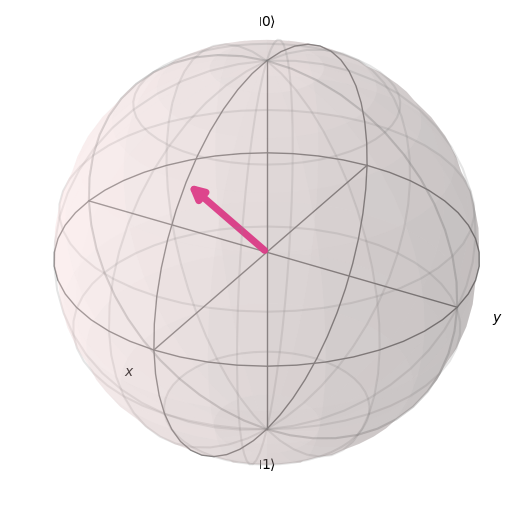

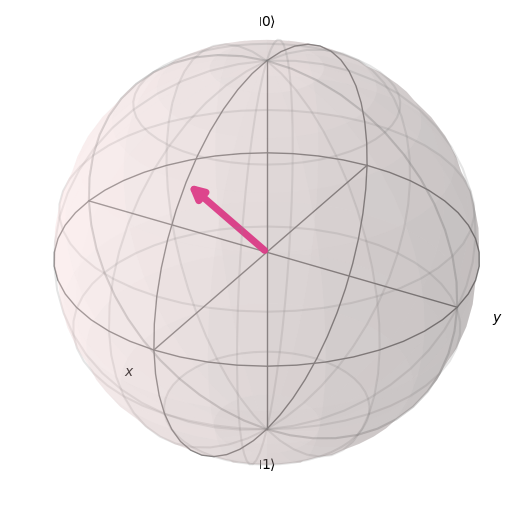

In [2]:
# Plot Bloch sphere points in Cartesian and
# spherical coordinates using plot_bloch_vector

display(plot_bloch_vector([sin(pi/4),0,cos(pi/4)]))
display(plot_bloch_vector([1, pi/4, 0], coord_type='spherical'))

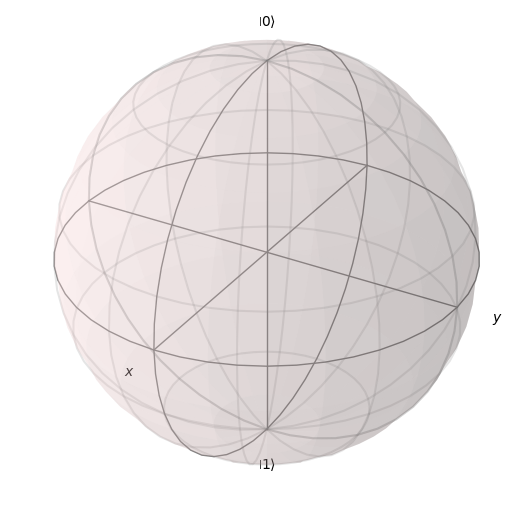

In [3]:
# Plot the center point of the Bloch ball
# using plot_bloch_vector

display(plot_bloch_vector([0,0,0]))

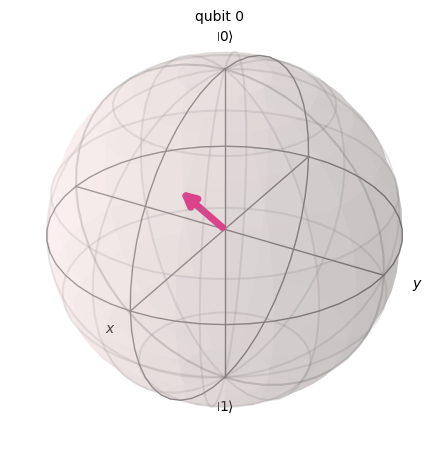

In [4]:
# Plot a Bloch ball point using plot_bloch_multivector

rho = DensityMatrix([[3/4, 1/4],[1/4,1/4]])
display(plot_bloch_multivector(rho))

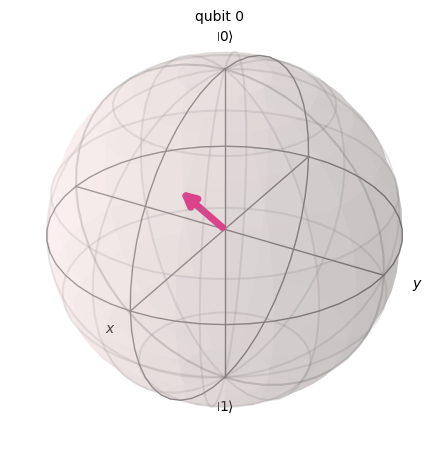

In [5]:
# Plot a Bloch ball point using the
# DensityMatrix draw method

display(rho.draw('bloch'))

### [Plotting Bloch sphere points in Qiskit](#plotting-bloch-sphere-points-in-qiskit)


## [Multiple systems and reduced states](#multiple-systems-and-reduced-states)
Now we'll turn our attention to how density matrices work for multiple systems, including examples of different types of correlations they can express and how they can be used to describe the states of isolated parts of compound systems.

### [Multiple systems](#multiple-systems)

Density matrices can represent states of multiple systems in an analogous way to state vectors in the simplified formulation of quantum information, following the same basic idea that multiple systems can be viewed as if they’re single, compound systems. In mathematical terms, the rows and columns of density matrices representing states of multiple systems are placed in correspondence with the Cartesian product of the classical state sets of the individual systems.

For example, recall the state vector representations of the four Bell states:

$$
|\phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \\
|\phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) \\
|\psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) \\
|\psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
$$

The density matrix representations of these states are as follows:

$$
|\phi^+\rangle \langle \phi^+| =
\begin{pmatrix}
\frac{1}{2} & 0 & 0 & \frac{1}{2} \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\frac{1}{2} & 0 & 0 & \frac{1}{2}
\end{pmatrix}, \quad
|\phi^-\rangle \langle \phi^-| =
\begin{pmatrix}
\frac{1}{2} & 0 & 0 & -\frac{1}{2} \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
-\frac{1}{2} & 0 & 0 & \frac{1}{2}
\end{pmatrix}
$$

$$
|\psi^+\rangle \langle \psi^+| =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}, \quad
|\psi^-\rangle \langle \psi^-| =
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & \frac{1}{2} & -\frac{1}{2} & 0 \\
0 & -\frac{1}{2} & \frac{1}{2} & 0 \\
0 & 0 & 0 & 0
\end{pmatrix}
$$

---

## Product states

Similar to what we had for state vectors, tensor products of density matrices represent *independence* between the states of multiple systems. For instance, if $X$ is prepared in the state represented by the density matrix $\rho$ and $Y$ is independently prepared in the state represented by $\sigma$, then the density matrix describing the state of $(X, Y)$ is the tensor product $\rho \otimes \sigma$.

The same terminology is used here as in the simplified formulation of quantum information: states of this form are referred to as *product states*.


Correlated and entangled states

States that cannot be expressed as product states represent **correlations** between systems. There are, in fact, different types of correlations that can be represented by density matrices. Here are a few examples:

---

1. **Correlated classical states.**  
For example, we can express the situation in which Alice and Bob share a random bit like this:

$$
\frac{1}{2} |0\rangle \langle 0| \otimes |0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1| \otimes |1\rangle \langle 1| =
\begin{pmatrix}
\frac{1}{2} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{2}
\end{pmatrix}
$$

---

2. **Ensembles of quantum states.**  
Suppose we have $m$ density matrices $\rho_0, \dots, \rho_{m-1}$, all representing states of a system $X$, and we randomly choose one of these states according to a probability vector $(p_0, \dots, p_{m-1})$. Such a process is represented by an *ensemble* of states, which includes the specification of the density matrices $\rho_0, \dots, \rho_{m-1}$ as well as the probabilities $(p_0, \dots, p_{m-1})$.

We can associate an ensemble of states with a single density matrix, describing both the random choice of $k$ and the corresponding density matrix $\rho_k$, like this:

$$
\sum_{k=0}^{m-1} p_k |k\rangle \langle k| \otimes \rho_k
$$

To be clear, this is the state of a pair $(Y, X)$ where $Y$ represents the classical selection of $k$ — so we’re assuming its classical state set is $\{0, \dots, m-1\}$. States of this form are sometimes called **classical-quantum states**.

---

3. **Separable states.**  
We can imagine situations in which we have a classical correlation among the quantum states of two systems:

$$
\sum_{k=0}^{m-1} p_k \rho_k \otimes \sigma_k
$$

In words, for each $k$ from $0$ to $m-1$, we have that with probability $p_k$, the system on the left is in the state $\rho_k$ and the system on the right is in the state $\sigma_k$. States like this are called **separable states**. This concept can also be extended to more than two systems.

---

4. **Entangled states.**  
Not all states of pairs of systems are separable. In the general formulation of quantum information this is how entanglement is defined: states that are not separable are said to be **entangled**.

This terminology is consistent with the terminology we used in *Basics of quantum information*. There we said that quantum state vectors that are not product states represent entangled states — and indeed, for any quantum state vector $|\psi\rangle$ that is not a product state, we find that the state represented by the density matrix $|\psi\rangle \langle \psi|$ is not separable.

> Entanglement is much more complicated than this for states that are not pure.

---

## Reduced states and the partial trace

There’s a simple but important thing we can do with density matrices in the context of multiple systems, which is to describe the states we obtain by ignoring some of the systems. When multiple systems are in a quantum state, and we discard or choose to ignore one or more of the systems, the state of the remaining systems is called the **reduced state** of those systems.

Density matrix descriptions of reduced states are easily obtained through a mapping, known as the **partial trace**, from the density matrix describing the state of the whole.

---

### Example: reduced states for an e-bit

Suppose that we have a pair of qubits $(A, B)$ that are together in the state:

$$
|\phi^+\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle
$$

We can imagine that Alice holds the qubit $A$ and Bob holds $B$, which is to say that together they share an **e-bit**. We’d like to have a density matrix description of **Alice’s qubit $A$ in isolation**, as if Bob decided to take his qubit and visit the stars, never to be seen again.


First let's think about what would happen if Bob decided somewhere on his journey to measure his qubit with respect to a standard basis measurement. If he did this, he would obtain the outcome 0 with probability

$$
\| (\mathbb{I}_A \otimes \langle 0|) |\phi^+\rangle \|^2 = \left\| \frac{1}{\sqrt{2}} |0\rangle \right\|^2 = \frac{1}{2},
$$

in which case the state of Alice’s qubit becomes $|0\rangle$; and he would obtain the outcome 1 with probability

$$
\| (\mathbb{I}_A \otimes \langle 1|) |\phi^+\rangle \|^2 = \left\| \frac{1}{\sqrt{2}} |1\rangle \right\|^2 = \frac{1}{2},
$$

in which case the state of Alice’s qubit becomes $|1\rangle$.

---

So, if we ignore Bob’s measurement outcome and focus on Alice’s qubit, we conclude that she obtains the state $|0\rangle$ with probability $1/2$ and the state $|1\rangle$ with probability $1/2$. This leads us to describe the state of Alice’s qubit in isolation by the density matrix:

$$
\frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1| = \frac{1}{2} \mathbb{I}_A.
$$

That is, Alice’s qubit is in the **completely mixed state**. To be clear, this description of the state of Alice’s qubit doesn’t include Bob’s measurement outcome; we’re ignoring Bob altogether.

---

Now, it might seem like the density matrix description of Alice’s qubit in isolation that we’ve just obtained relies on the assumption that Bob has measured his qubit, but this is not actually so. What we’ve done is to use the possibility that Bob measures his qubit to argue that the completely mixed state arises as the state of Alice’s qubit, based on what we’ve already learned.

We can also consider the state of Bob’s qubit $B$, which happens to be the completely mixed state as well. Indeed, for all four Bell states we find that the reduced state of both Alice’s qubit and Bob’s qubit is the completely mixed state.

---

## Reduced states for a general quantum state vector

Now let’s generalize the example just discussed to two arbitrary systems $A$ and $B$, not necessarily qubits in the state $|\phi^+\rangle$. We’ll assume the classical state sets of $A$ and $B$ are $\Sigma$ and $\Gamma$, respectively.

A density matrix $\rho$ representing a state of the combined system $(A, B)$ therefore has row and column indices corresponding to the Cartesian product $\Sigma \times \Gamma$.

Suppose that the state of $(A, B)$ is described by the quantum state vector $|\psi\rangle$, so the density matrix describing this state is $\rho = |\psi\rangle \langle \psi|$. We’ll obtain a density matrix description of the state of $A$ in isolation, which is conventionally denoted $\rho_A$.

---

The state vector $|\psi\rangle$ can be expressed in the form:

$$
|\psi\rangle = \sum_{b \in \Gamma} |\phi_b\rangle \otimes |b\rangle
$$

for a uniquely determined collection of vectors $\{ |\phi_b\rangle : b \in \Gamma \}$. In particular, these vectors can be determined through a simple formula:

$$
|\phi_b\rangle = (\mathbb{I}_A \otimes \langle b|) |\psi\rangle
$$

Reasoning similarly to the previous example of an e-bit, if we were to measure the system $B$ with a standard basis measurement, we would obtain each outcome $b \in \Gamma$ with probability $\| |\phi_b\rangle \|^2$, in which case the state of $A$ becomes

$$
\frac{|\phi_b\rangle}{\| |\phi_b\rangle \|}.
$$

---

As a density matrix, this state can be written as follows:

$$
|\phi_b\rangle \langle \phi_b| = \left( \mathbb{I}_A \otimes \langle b| \right) |\psi\rangle \langle \psi| \left( \mathbb{I}_A \otimes |b\rangle \right)
$$



### [Reduced states and the partial trace](#reduced-states-and-the-partial-trace)

Averaging the different states according to the probabilities of the respective outcomes, we arrive at the density matrix

$$
\rho_A = \sum_{b \in \Gamma} \| |\phi_b\rangle \|^2 \cdot \frac{|\phi_b\rangle \langle \phi_b|}{\| |\phi_b\rangle \|^2}
= \sum_{b \in \Gamma} |\phi_b\rangle \langle \phi_b| 
= \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b|) |\psi\rangle \langle \psi| (\mathbb{I}_A \otimes |b\rangle)
$$

---

## The partial trace

The formula

$$
\rho_A = \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b|) |\psi\rangle \langle \psi| (\mathbb{I}_A \otimes |b\rangle)
$$

leads us to the description of the reduced state of $A$ for any density matrix $\rho$ of the pair $(A, B)$, not just a pure state.

$$
\rho_A = \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b|) \rho (\mathbb{I}_A \otimes |b\rangle)
$$

This formula must work, simply by linearity together with the fact that every density matrix can be written as a convex combination of pure states.

The operation being performed on $\rho$ to obtain $\rho_A$ in this equation is known as the **partial trace**, and to be more precise we say that the partial trace is performed on $B$, or that $B$ is **traced out**. This operation is denoted $\text{Tr}_B$, so we can write:

$$
\text{Tr}_B(\rho) = \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b|) \rho (\mathbb{I}_A \otimes |b\rangle).
$$

We can also define the partial trace on $A$, so it’s the system $\Lambda$ that gets traced out rather than $B$, like this:

$$
\text{Tr}_A(\rho) = \sum_{a \in \Sigma} ( \langle a| \otimes \mathbb{I}_B ) \rho ( |a\rangle \otimes \mathbb{I}_B )
$$

This gives us the density matrix description $\rho_B$ of the state of $B$ in isolation rather than $A$.

To recapitulate, if $(A, B)$ is any pair of systems and we have a density matrix $\rho$ describing a state of $(A, B)$, the **reduced states** of the systems $A$ and $B$ are as follows:

$$
\rho_A = \text{Tr}_B(\rho) = \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b|) \rho (\mathbb{I}_A \otimes |b\rangle)
$$

$$
\rho_B = \text{Tr}_A(\rho) = \sum_{a \in \Sigma} ( \langle a| \otimes \mathbb{I}_B ) \rho ( |a\rangle \otimes \mathbb{I}_B )
$$

If $\rho$ is a density matrix, then $\rho_A$ and $\rho_B$ will also necessarily be density matrices.

---

## Generalization to three or more systems

These notions can be generalized to any number of systems in place of two in a natural way. In general, we can put the names of whatever systems we choose in the subscript of a density matrix $\rho$ to describe the reduced state of just those systems.

For example, if $A$, $B$, and $C$ are systems and $\rho$ is a density matrix describing a state of $(A, B, C)$, then we can define:

$$
\rho_{AC} = \text{Tr}_B(\rho) = \sum_{b \in \Gamma} (\mathbb{I}_A \otimes \langle b| \otimes \mathbb{I}_C ) \rho ( \mathbb{I}_A \otimes |b\rangle \otimes \mathbb{I}_C )
$$

$$
\rho_C = \text{Tr}_{AB}(\rho) = \sum_{a \in \Sigma} \sum_{b \in \Gamma} ( \langle a| \otimes \langle b| \otimes \mathbb{I}_C ) \rho ( |a\rangle \otimes |b\rangle \otimes \mathbb{I}_C )
$$

and similarly for other choices for the systems.

---

## Alternative description of the partial trace

An alternative way to describe the partial trace mappings $\text{Tr}_A$ and $\text{Tr}_B$ is that they are the **unique linear mappings** that satisfy the formulas.

$$
\text{Tr}_A(M \otimes N) = \text{Tr}(M) N \qquad \text{Tr}_B(M \otimes N) = \text{Tr}(N) M.
$$

In these formulas, $N$ and $M$ are square matrices of the appropriate sizes: the rows and columns of $M$ correspond to the classical states of $A$ and the rows and columns of $N$ correspond to the classical states of $B$.

This characterization of the partial trace is not only fundamental from a mathematical viewpoint, but can also allow for quick calculations in some situations. For example, consider this state of a pair of qubits $(A, B)$:

$$
\rho = \frac{1}{2} |0\rangle \langle 0| \otimes |0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1| \otimes |+\rangle \langle +|
$$

To compute the reduced state $\rho_A$, for instance, we can use linearity together with the fact that $|0\rangle \langle 0|$ and $|+\rangle \langle +|$ have unit trace.

$$
\rho_A = \text{Tr}_B(\rho) = \frac{1}{2} \text{Tr}(|0\rangle \langle 0|) |0\rangle \langle 0| + \frac{1}{2} \text{Tr}(|+\rangle \langle +|) |1\rangle \langle 1| = \frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |1\rangle \langle 1|
$$

The reduced state $\rho_B$ can be computed similarly.

$$
\rho_B = \text{Tr}_A(\rho) = \frac{1}{2} \text{Tr}(|0\rangle \langle 0|) |0\rangle \langle 0| + \frac{1}{2} \text{Tr}(|1\rangle \langle 1|) |+\rangle \langle +| = \frac{1}{2} |0\rangle \langle 0| + \frac{1}{2} |+\rangle \langle +|
$$

---

## The partial trace for two qubits

The partial trace can also be described explicitly in terms of matrices. Here we’ll do this just for two qubits, but this can also be generalized to larger systems. Assume that we have two qubits $(A, B)$, so that any density matrix describing a state of these two qubits can be written as

$$
\rho = \begin{pmatrix}
\alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33}
\end{pmatrix}
$$

for some choice of complex numbers $\{\alpha_{jk} : 0 \le j, k \le 3 \}$.

The partial trace over the first system has the following formula:

$$
\text{Tr}_A \begin{pmatrix}
\alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33}
\end{pmatrix}
=
\begin{pmatrix}
\alpha_{00} + \alpha_{22} & \alpha_{01} + \alpha_{23} \\
\alpha_{10} + \alpha_{32} & \alpha_{11} + \alpha_{33}
\end{pmatrix}
$$

One way to think about this formula begins by viewing $4 \times 4$ matrices as $2 \times 2$ block matrices, where each block is $2 \times 2$. That is,

$$
\rho = \begin{pmatrix}
M_{0,0} & M_{0,1} \\
M_{1,0} & M_{1,1}
\end{pmatrix}
$$

for

$$
M_{0,0} = \begin{pmatrix}
\alpha_{00} & \alpha_{01} \\
\alpha_{10} & \alpha_{11}
\end{pmatrix}, \quad
M_{0,1} = \begin{pmatrix}
\alpha_{02} & \alpha_{03} \\
\alpha_{12} & \alpha_{13}
\end{pmatrix}, \quad
M_{1,0} = \begin{pmatrix}
\alpha_{20} & \alpha_{21} \\
\alpha_{30} & \alpha_{31}
\end{pmatrix}, \quad
M_{1,1} = \begin{pmatrix}
\alpha_{22} & \alpha_{23} \\
\alpha_{32} & \alpha_{33}
\end{pmatrix}
$$

We then have:

$$
\text{Tr}_A \begin{pmatrix}
M_{0,0} & M_{0,1} \\
M_{1,0} & M_{1,1}
\end{pmatrix}
= M_{0,0} + M_{1,1}
$$

Here is the formula when the second system is traced out rather than the first.

We begin with the formula for the partial trace over system **B**:
$$
\text{Tr}_B\left(
\begin{pmatrix}
\alpha_{00} & \alpha_{01} & \alpha_{02} & \alpha_{03} \\
\alpha_{10} & \alpha_{11} & \alpha_{12} & \alpha_{13} \\
\alpha_{20} & \alpha_{21} & \alpha_{22} & \alpha_{23} \\
\alpha_{30} & \alpha_{31} & \alpha_{32} & \alpha_{33}
\end{pmatrix}
\right)
=
\begin{pmatrix}
\text{Tr}
\begin{pmatrix}
\alpha_{00} & \alpha_{01} \\
\alpha_{10} & \alpha_{11}
\end{pmatrix}
&
\text{Tr}
\begin{pmatrix}
\alpha_{02} & \alpha_{03} \\
\alpha_{12} & \alpha_{13}
\end{pmatrix}
\\
\text{Tr}
\begin{pmatrix}
\alpha_{20} & \alpha_{21} \\
\alpha_{30} & \alpha_{31}
\end{pmatrix}
&
\text{Tr}
\begin{pmatrix}
\alpha_{22} & \alpha_{23} \\
\alpha_{32} & \alpha_{33}
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
\alpha_{00} + \alpha_{11} & \alpha_{02} + \alpha_{13} \\
\alpha_{20} + \alpha_{31} & \alpha_{22} + \alpha_{33}
\end{pmatrix}
$$

In terms of block matrices:
$$
\text{Tr}_B
\begin{pmatrix}
M_{0,0} & M_{0,1} \\
M_{1,0} & M_{1,1}
\end{pmatrix}
=
\begin{pmatrix}
\text{Tr}(M_{0,0}) & \text{Tr}(M_{0,1}) \\
\text{Tr}(M_{1,0}) & \text{Tr}(M_{1,1})
\end{pmatrix}
$$

---

### Example:

Apply this to the state:
$$
\rho = \frac{1}{2}|0\rangle \langle 0| \otimes |0\rangle \langle 0| + \frac{1}{2}|1\rangle \langle 1| \otimes |+\rangle \langle +| =
\begin{pmatrix}
\frac{1}{2} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{4} & \frac{1}{4} \\
0 & 0 & \frac{1}{4} & \frac{1}{4}
\end{pmatrix}
$$

---

The reduced state of the first system A is:
$$
\text{Tr}_B(\rho) =
\begin{pmatrix}
\text{Tr}
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & 0
\end{pmatrix}
&
\text{Tr}
\begin{pmatrix}
0 & 0 \\
0 & 0
\end{pmatrix}
\\
\text{Tr}
\begin{pmatrix}
0 & 0 \\
0 & 0
\end{pmatrix}
&
\text{Tr}
\begin{pmatrix}
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & \frac{1}{2}
\end{pmatrix}
$$

---

The reduced state of the second system B is:
$$
\text{Tr}_A(\rho) =
\begin{pmatrix}
\frac{1}{2} & 0 \\
0 & 0
\end{pmatrix}
+
\begin{pmatrix}
\frac{1}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
=
\begin{pmatrix}
\frac{3}{4} & \frac{1}{4} \\
\frac{1}{4} & \frac{1}{4}
\end{pmatrix}
$$

---

### Reduced states in Qiskit

The `partial_trace` function computes the partial trace over a collection of systems given a `DensityMatrix` argument.




In [6]:
# Required imports for code cells

from qiskit.quantum_info import DensityMatrix, partial_trace
from qiskit.visualization import plot_bloch_multivector

print('Imports loaded.')

Imports loaded.


In [7]:
# Define and display a density matrix for a two-qubit
# correlated state along with reduced states

rho_0 = DensityMatrix.from_label('0')
rho_1 = DensityMatrix.from_label('1')
rho_plus = DensityMatrix.from_label('+')
rho = 1/2 * rho_0.tensor(rho_0) + 1/2 * rho_1.tensor(rho_plus)

display(rho.draw('latex'))
display(partial_trace(rho, [0]).draw(output='latex'))
display(partial_trace(rho, [1]).draw(output='latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

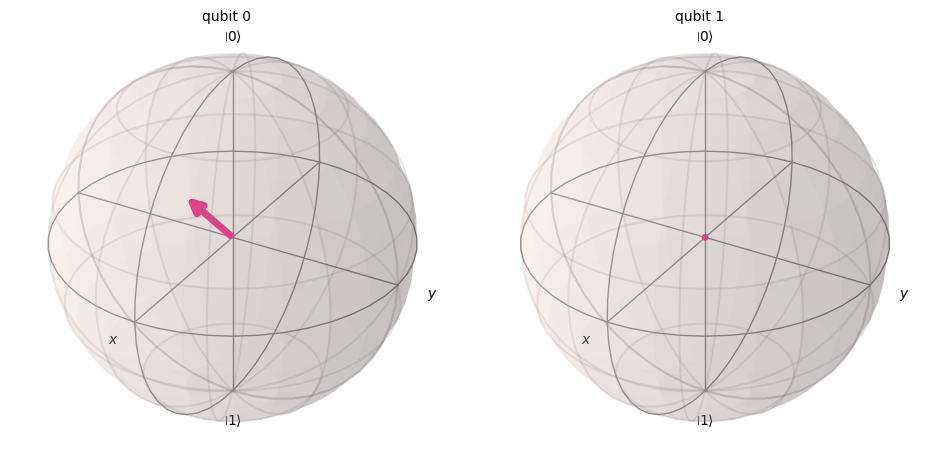

In [8]:
# Plot Bloch ball representations for
# the two reduced states

display(plot_bloch_multivector(rho))